Get data

In [1]:
# Чтобы скачать с кагла нужно сгенерить апи, создать в гугл драйве папку Kaggle и туда засунуть файл kaggle.json, который качается с кагла
# Пни меня, Ринат, если что, я покажу, что делать для скачивания. Вообще вот ссыль с инструкцией:
# https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

# я предлагаю, чтобы не было такой ебли - закинуть потом зип на облако (не гугл)

import os
from google.colab import drive
from IPython.display import clear_output
import cv2
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

!pip install kaggle
!mkdir data
!kaggle datasets download -d gpiosenka/100-bird-species
!unzip 100-bird-species.zip -d data

clear_output()


In [31]:
DATA_PATH = f'{os.getcwd()}/data'
TRAIN_PATH = f'{DATA_PATH}/train'
TEST_PATH = f'{DATA_PATH}/test'
TYPE_PATH = "{}/{}"

NUM_ELEMENTS_TO_SHOW = 200


def get_data_and_labels():
    types = os.listdir(TRAIN_PATH)

    train, test, train_images, test_images = [], [], [], []
    for tp in types:
        train_type_path = TYPE_PATH.format(TRAIN_PATH, tp)
        for img in os.listdir(train_type_path):
            image = cv2.imread(TYPE_PATH.format(train_type_path, img), cv2.IMREAD_COLOR)
            train_images.append(image)
            train.append([tp, image.ravel()])

        test_type_path = TYPE_PATH.format(TEST_PATH, tp)
        for img in os.listdir(test_type_path):
            image = cv2.imread(TYPE_PATH.format(test_type_path, img), cv2.IMREAD_COLOR)
            test_images.append(image)
            test.append([tp, image.ravel()])

    train_labels = [i[0] for i in train]
    train_data = [i[1] for i in train]

    test_labels = [i[0] for i in test]
    test_data = [i[1] for i in test]
    return train_labels, train_data, test_labels, test_data, train_images, test_images

train_labels, train_data, test_labels, test_data, train_images, test_images = get_data_and_labels()
print(len(test_data), len(test_labels), len(train_data), len(train_labels))

1125 1125 31316 31316


In [32]:
def embeddings(train_data, num):
  # just to show!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  X = np.vstack(train_data[:num])

  return TSNE(n_components=3).fit_transform(X)

tsne = embeddings(train_data, NUM_ELEMENTS_TO_SHOW)

Plot 2d

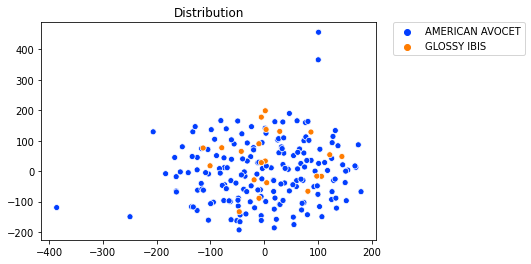

In [33]:
def plot2d(tsne, labels, num):
    palette = sb.color_palette("bright", np.unique(labels[:num]).shape[0])
    plot = sb.scatterplot(tsne[:, 0], tsne[:, 1], hue=labels[:num], legend='full', palette=palette).set_title(
        "Distribution")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plot2d(tsne, train_labels, NUM_ELEMENTS_TO_SHOW)

Plot 3d

In [34]:
def plot3d(tsne, train_labels, num):
    fig = px.scatter_3d(x=tsne[::, 0],
                        y=tsne[::, 1],
                        z=tsne[::, 2],
                        color=[str(label) for label in train_labels[:num]],
                        opacity=0.7)
    fig.show()

plot3d(tsne, train_labels, NUM_ELEMENTS_TO_SHOW)

225 225


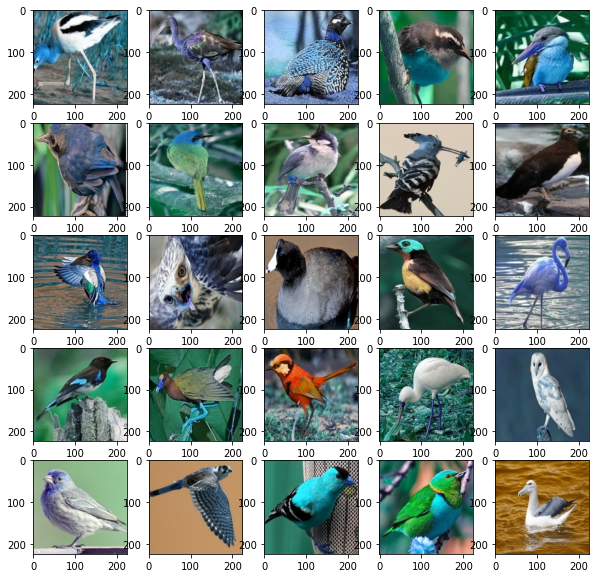

In [36]:
def take_one_each_class():
    types = os.listdir(TRAIN_PATH)
    data, imgs = [], []
    for tp in types:
        train_type_path = TYPE_PATH.format(TRAIN_PATH, tp)
        image = cv2.imread(TYPE_PATH.format(train_type_path, os.listdir(train_type_path)[0]), cv2.IMREAD_COLOR)
        imgs.append(image)
        data.append([tp, image.ravel()])
    return [i[0] for i in data], [i[1] for i in data], imgs

def show_examples(imgs):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(imgs[i])
    plt.show()


show_train_labels, show_train_data, imgs = take_one_each_class()
print(len(show_train_labels), len(show_train_data))
tsne_show = embeddings(show_train_data, len(show_train_labels))

show_examples(imgs)

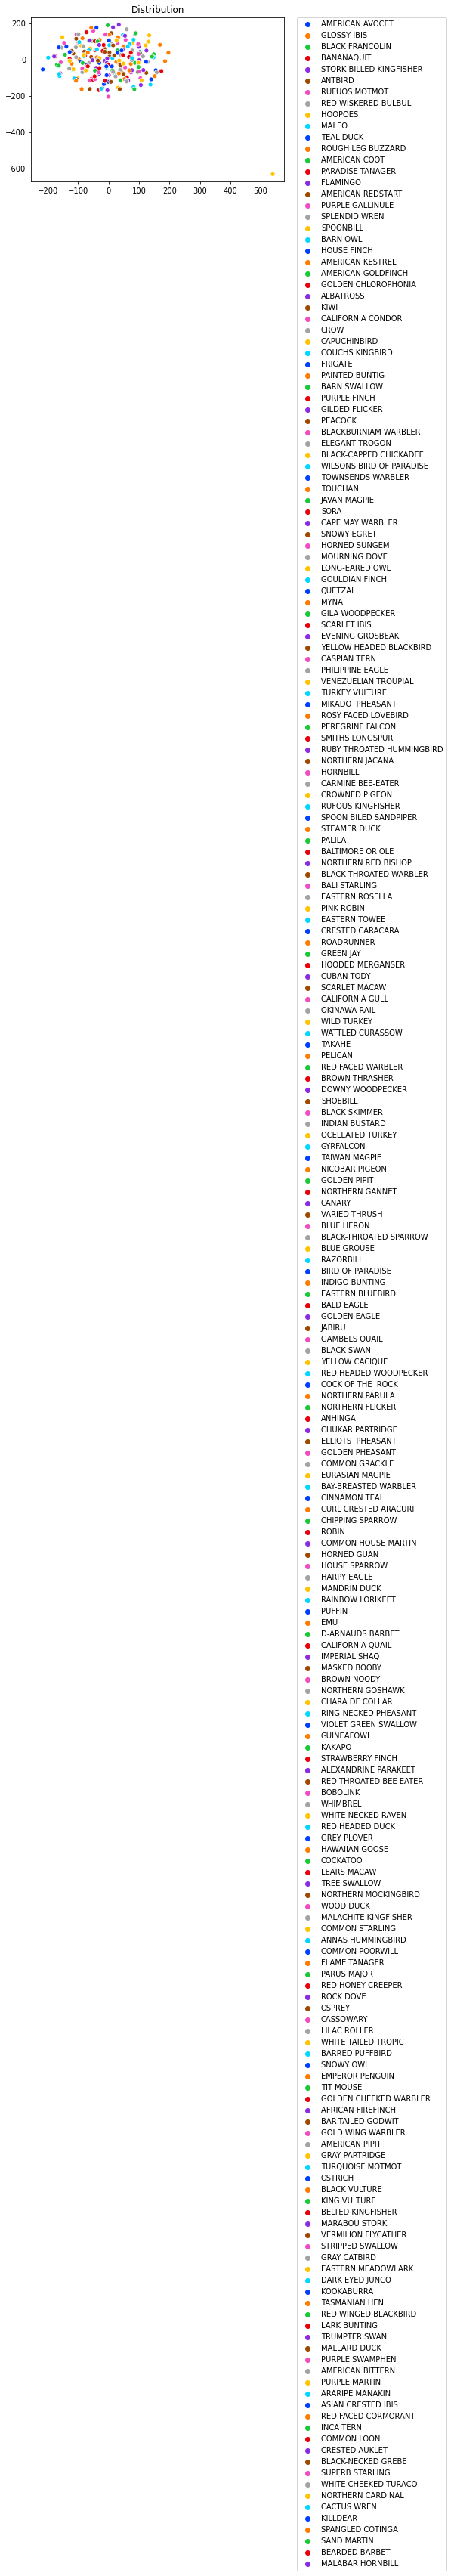

In [38]:
plot2d(tsne_show, show_train_labels, len(show_train_labels))

In [39]:
plot3d(tsne_show, show_train_labels, len(show_train_labels))